In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Let's start by reading in the titanic.csv file into a pandas dataframe.

In [2]:
data=pd.read_csv("C:/Users/guren/Desktop/Machine Learning/titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

###### Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

###### We can use seaborn to create a simple heatmap to see where we are missing data!

In [4]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


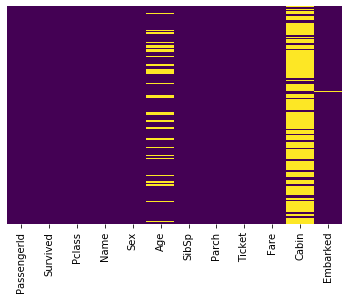

In [5]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

#### Let's continue on by visualizing some more of the data!

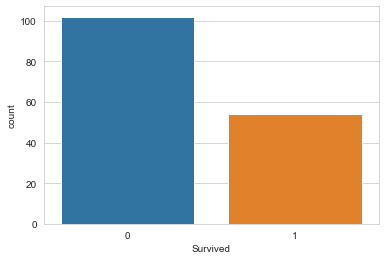

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

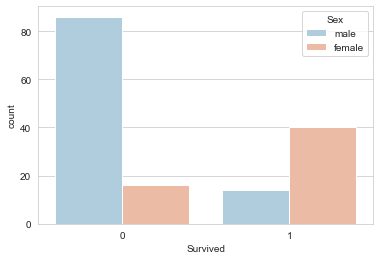

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

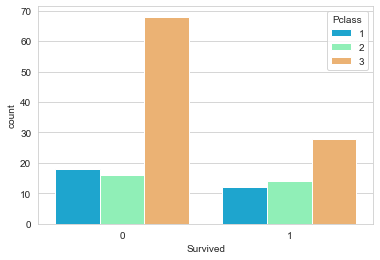

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

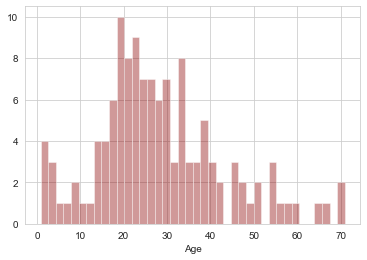

In [9]:
sns.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=40)

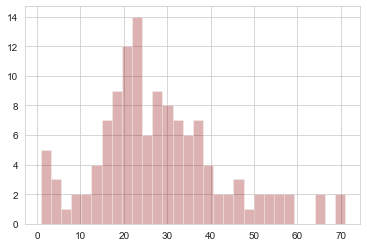

In [11]:
data['Age'].hist(bins=30,color='darkred',alpha=0.3)

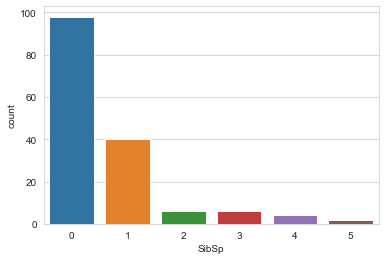

In [12]:
sns.countplot(x='SibSp',data=data)

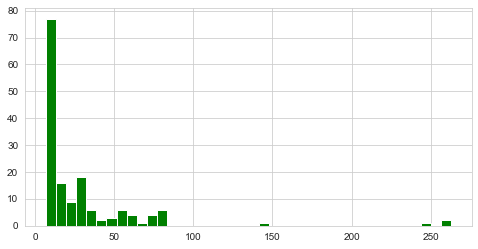

In [13]:
data['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Data Cleaning

###### We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

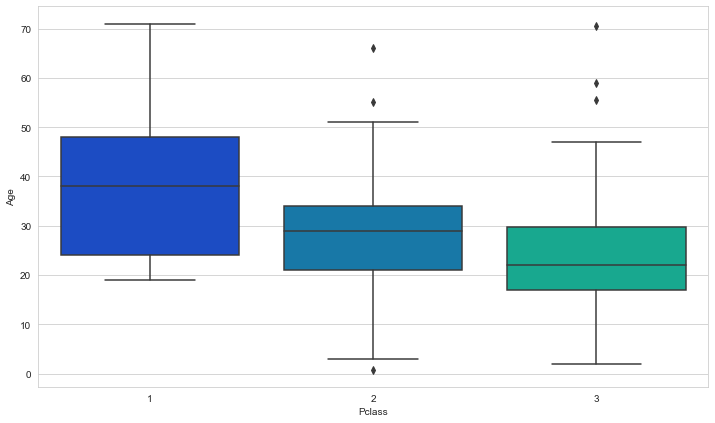

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [21]:

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [22]:
data['Age']=data[['Age','Pclass']].apply(impute_age,axis=1)

In [23]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


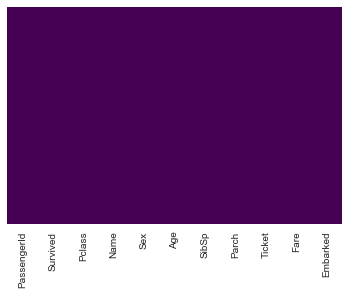

In [28]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

data.drop('Cabin',axis=1,inplace=True)

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,S


In [27]:
data.dropna(inplace=True)

# Converting Categorical Features

##### We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 11 columns):
PassengerId    155 non-null int64
Survived       155 non-null int64
Pclass         155 non-null int64
Name           155 non-null object
Sex            155 non-null object
Age            155 non-null float64
SibSp          155 non-null int64
Parch          155 non-null int64
Ticket         155 non-null object
Fare           155 non-null float64
Embarked       155 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 14.5+ KB


In [30]:
pd.get_dummies(data['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [34]:
sex=pd.get_dummies(data['Sex'],drop_first=True)
embark=pd.get_dummies(data['Embarked'],drop_first=True)

In [40]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [41]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,24.0,1,0,7.2500
1,2,1,1,37.0,1,0,71.2833
2,3,1,3,24.0,0,0,7.9250
3,4,1,1,37.0,1,0,53.1000
4,5,0,3,24.0,0,0,8.0500


In [42]:
data=pd.concat([data,sex,embark],axis=1)

In [43]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24.0,1,0,7.2500,1,0,1
1,2,1,1,37.0,1,0,71.2833,0,0,0
2,3,1,3,24.0,0,0,7.9250,0,0,1
3,4,1,1,37.0,1,0,53.1000,0,0,1
4,5,0,3,24.0,0,0,8.0500,1,0,1


###### Great! Our data is ready for our model!

# Building a Logistic Regression Model

##### Let's start by splitting our data into a training set and test set

In [44]:
X=data.drop('Survived',axis=1)
y=data['Survived']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((103, 9), (103,), (52, 9), (52,))

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lm=LogisticRegression()
lm.fit(X_train,y_train)

C:\Users\guren\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
predict=lm.predict(X_test)

In [58]:
from  sklearn.metrics import confusion_matrix

In [59]:
accuracy=confusion_matrix(y_test,predict)

In [60]:
accuracy

array([[33,  1],
       [ 7, 11]], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy=accuracy_score(y_test,predict)

In [66]:
accuracy

0.8461538461538461

In [68]:
predict

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        34
           1       0.92      0.61      0.73        18

    accuracy                           0.85        52
   macro avg       0.87      0.79      0.81        52
weighted avg       0.86      0.85      0.84        52

